In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
drive.mount('/content/drive', force_remount=True)

NameError: ignored

**BAG Dataset of all Quality Indicators including Case numbers and duration of hospital stay etc.**

* https://www.bag.admin.ch/bag/de/home/zahlen-und-statistiken/zahlen-fakten-zu-spitaelern/qualitaetsindikatoren-der-schweizer-akutspitaeler/qualitaetsindikatoren-dokumentation.html
* Data from 2008 - 2021 available, grouped by hospital, only inpatient data
* Per indicator (usually grouped by aged) and hospital, the following data is shown:
  * Expected Rate of a procedure/event
  * Observed Rate of a procedure/event
  * SMR (Standardized Mortality Ration), which standardizes the rates observed to the rates expected given the age and gender of the patient population in that hospital
  * Case numbers



**Step 1**: Downloading the Files from the BAG Website, manipulating the Excel such that the files can be imported into a Dataframe

Excel Manipulations:
  * In Excel, replacing all the È by E (using the replace function) --> utf-8 otherwise can not decode the data and this gives an error
  * Replace all * by NaN
  * Convert all Percentage Values into Decimals
  * Using the Textkonvertierungsassistent in Excel to separate the values by commas instead of tabs --> otherwise empty field in Excel are not recognized and an error message appears because the number of columns is different between the rows
    * Save File as .txt, then when trying to open with Excel the Textkonvertierungsassistent opens and you can select Comma as Delimiter

**Step 2:** Import the Data from the mounted Google Drive into a Pandas Dataframe

In [ ]:
df_08_09 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2008_2009_clean.csv', sep=';')
df_10_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2010_clean.csv', sep=';')
df_11_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2011_clean.csv', sep=';')
df_12_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2012_clean.csv', sep=';')
df_13_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2013_clean.csv', sep=';')
df_14_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2014_clean.csv', sep=';')
df_15_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2015_clean.csv', sep=';')
df_16_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2016_clean.csv', sep=';')
df_17_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2017_clean.csv', sep=';', low_memory = False)
df_18_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2018_clean.csv', sep=';', low_memory = False)
df_19_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2019_clean.csv', sep=';', low_memory = False)
df_20_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2020_clean.csv', sep=';', low_memory = False)
df_21_imp = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DATA/2021_clean.csv', sep=';', low_memory = False)

**Step 3:** Split the Dataframe 2008 & 2009 into two, clean all the other dataframes so that only the necessary columns are retained

In [ ]:
columns_2008 = ['institution', 'indicator', 'taux observE 2008', 'taux attendu 2008', 'SMR 2008', 'nombre de cas 2008']
columns_2009 = ['institution', 'indicator', 'taux observE 2009', 'taux attendu 2009', 'SMR 2009', 'nombre de cas 2009']

df_08 = df_08_09[columns_2008]
df_09 = df_08_09[columns_2009]

columns_2010 = ['institution', 'indicator', 'taux observE 2010', 'taux attendu 2010', 'SMR 2010', 'nombre de cas 2010']
df_10 = df_10_imp[columns_2010]

columns_2011 = ['institution', 'indicator', 'taux observE 2011', 'taux attendu 2011', 'SMR 2011', 'nombre de cas 2011']
df_11 = df_11_imp[columns_2011]

columns_2012 = ['institution', 'indicator', 'taux observE 2012', 'taux attendu 2012', 'SMR 2012', 'nombre de cas 2012']
df_12 = df_12_imp[columns_2012]

columns_2013 = ['institution', 'indicator', 'taux observE 2013', 'taux attendu 2013', 'SMR 2013', 'nombre de cas 2013']
df_13 = df_13_imp[columns_2013]

columns_2014 = ['institution', 'indicator', 'taux observE 2014', 'taux attendu 2014', 'SMR 2014', 'nombre de cas 2014']
df_14 = df_14_imp[columns_2014]

columns_2015 = ['institution', 'indicator', 'taux observE 2015', 'taux attendu 2015', 'SMR 2015', 'nombre de cas 2015']
df_15 = df_15_imp[columns_2015]

columns_2016 = ['institution', 'indicator', 'taux observE 2016', 'taux attendu 2016', 'SMR 2016', 'nombre de cas 2016']
df_16 = df_16_imp[columns_2016]

columns_2017 = ['institution', 'indicator', 'taux observE 2017', 'taux attendu 2017', 'SMR 2017', 'nombre de cas 2017']
df_17 = df_17_imp[columns_2017]

columns_2018 = ['institution', 'indicator', 'taux observE 2018', 'taux attendu 2018', 'SMR 2018', 'nombre de cas 2018']
df_18 = df_18_imp[columns_2018]

columns_2019 = ['institution', 'indicator', 'taux observE 2019', 'taux attendu 2019', 'SMR 2019', 'nombre de cas 2019']
df_19 = df_19_imp[columns_2019]

columns_2020 = ['institution', 'indicator', 'taux observE 2020', 'taux attendu 2020', 'SMR 2020', 'nombre de cas 2020']
df_20 = df_20_imp[columns_2020]

columns_2021 = ['institution', 'indicator', 'taux observé 2021', 'taux attendu 2021', 'SMR 2021', 'nombre de cas 2021']
df_21 = df_21_imp[columns_2021]

**Step 4:** Rename the columns so that all the columns across the dataframes are labelled the same (for later merging) and in english

In [ ]:
df_08.columns = ['hospital_name', 'indicator', 'observed_rate_2008', 'expected_rate_2008', 'SMR_2008', 'number_of_cases_2008']
df_09.columns = ['hospital_name', 'indicator', 'observed_rate_2009', 'expected_rate_2009', 'SMR_2009', 'number_of_cases_2009']
df_10.columns = ['hospital_name', 'indicator', 'observed_rate_2010', 'expected_rate_2010', 'SMR_2010', 'number_of_cases_2010']
df_11.columns = ['hospital_name', 'indicator', 'observed_rate_2011', 'expected_rate_2011', 'SMR_2011', 'number_of_cases_2011']
df_12.columns = ['hospital_name', 'indicator', 'observed_rate_2012', 'expected_rate_2012', 'SMR_2012', 'number_of_cases_2012']
df_13.columns = ['hospital_name', 'indicator', 'observed_rate_2013', 'expected_rate_2013', 'SMR_2013', 'number_of_cases_2013']
df_14.columns = ['hospital_name', 'indicator', 'observed_rate_2014', 'expected_rate_2014', 'SMR_2014', 'number_of_cases_2014']
df_15.columns = ['hospital_name', 'indicator', 'observed_rate_2015', 'expected_rate_2015', 'SMR_2015', 'number_of_cases_2015']
df_16.columns = ['hospital_name', 'indicator', 'observed_rate_2016', 'expected_rate_2016', 'SMR_2016', 'number_of_cases_2016']
df_17.columns = ['hospital_name', 'indicator', 'observed_rate_2017', 'expected_rate_2017', 'SMR_2017', 'number_of_cases_2017']
df_18.columns = ['hospital_name', 'indicator', 'observed_rate_2018', 'expected_rate_2018', 'SMR_2018', 'number_of_cases_2018']
df_19.columns = ['hospital_name', 'indicator', 'observed_rate_2019', 'expected_rate_2019', 'SMR_2019', 'number_of_cases_2019']
df_20.columns = ['hospital_name', 'indicator', 'observed_rate_2020', 'expected_rate_2020', 'SMR_2020', 'number_of_cases_2020']
df_21.columns = ['hospital_name', 'indicator', 'observed_rate_2021', 'expected_rate_2021', 'SMR_2021', 'number_of_cases_2021']

**Step 5:** All the Indicators are mentioned in different languages and the hospitals aren't written the same everywhere (different handling of Umlaute and é/è). I'll try defining a function that can loop through all our dataframes and replace the values so that we can then merge them all together.

* Names of Insitution were manually assembled into a dict with the key being a string within the institution name that would be common across the files even if the handling of Umlaute in the original datafiles was not uniform
* All Institution listed in the Spitalstatistik 2008 are included except the ones where the name gives away that they wouldn't perform C-Sections (Psychiatric Institution, Rehabilitiation etc.)

In [ ]:
institution_name_dict = {
    'Kantonsspital Aarau': 'Kantonsspital Aarau AG',
    'Kantonsspital Baden AG': 'Kantonsspital Baden AG',
    'Hirslanden Klinik Aarau': 'Hirslanden Klinik Aarau',
    'Fricktal': 'Gesundheitszentrum Fricktal',
    'Freiamt': 'Kreisspital für das Freiamt',
    'Zofingen': 'Spital Zofingen AG',
    'Menziken': 'Asana Gruppe AG Spital Menziken',
    'Leuggern': 'Asana Gruppe AG Spital Leuggern',
    'Rheinfelden': 'Schützen Rheinfelden AG, Klinik & Ambulatorium',
    'Schinznach': 'Bad Schinznach AG Privat­Klinik Im Park',
    'Salina': 'Salina Medizin AG, Privatklinik SALINA',
    'Villa im Park': 'Klinik Villa im Park AG',
    'Sonnenblick': 'Klinik Sonnenblick',
    'Barmelweid': 'Klinik Barmelweid AG',
    'Kantonales Spital und Pflegeheim': 'Kantonales Spital und Pflegeheim',
    'Herisau': 'Spitalverbund AR Spital Herisau',
    'Heiden': 'Spitalverbund AR Spital Heiden',
    'Gais': 'Klinik Gais AG',
    'Rheinburg': 'Rheinburg-­Klinik',
    'Rosenberg': 'Hirslanden Klinik am Rosenberg',
    'Berit': 'Berit Paracelsus ­Klinik AG',
    'Inselspital': 'Inselspital Bern',
    'Spital Netz Bern AG': 'Spital Netz Bern AG',
    'Saanenland': 'Spital Thun ­Simmental ­Saanenland AG',
    'Spitalzentrum Biel': 'Spitalzentrum Biel',
    'Lindenhofspital': 'Lindenhofspital',
    'SRO': 'SRO Spital Region Oberaargau AG',
    'Salem': 'Salem­ Spital',
    'Sonnenhof': 'Sonnenhof AG Bern',
    'Emmental': 'Regionalspital Emmental AG',
    'FMI': 'Spitäler FMI AG',
    'Klinik Beau­Site AG': 'Klinik Beau ­Site AG',
    'Jura bernois': 'Hôpital du Jura bernois SA',
    'Klinik Linde': 'Klinik Linde AG',
    'SGM Langenthal': 'Klinik SGM Langenthal',
    'Wyss': 'Privatklinik Wyss AG',
    'Soteria': 'Soteria Bern',
    'Schönberg': 'Gesundheitszentrum Schönberg Gunten AG',
    'Klinik Permanence': 'Klinik Permanence',
    'Siloah': 'Klinik Siloah',
    'Hohmad': 'Klinik Hohmad AG',
    'Bruderholz': 'Kantonsspital Bruderholz',
    'Liestal': 'Kantonsspital Liestal',
    'Laufen': 'Kantonsspital Laufen',
    'Wegman': 'Ita Wegman Klinik',
    'Birshof': 'Hirslanden Klinik Birshof',
    'Rennbahn': 'Praxisklinik Rennbahn AG',
    'UKBB': 'Universitäts­Kinderspital beider Basel (UKBB)',
    'Lukas': 'Lukas Klinik',
    'Ergholz': 'Ergolz ­Klinik',
    'Vista': 'Vista Klinik',
    'Basel': 'Universitätsspital Basel',
    'Clara': 'St. Claraspital',
    'Bethesda': 'Bethesda Spital AG',
    'Riehen': 'Gemeindespital Riehen',
    'Iselin': 'Merian Iselin Spital',
    'Platter': 'Felix Platter­ Spital',
    'HFR Fribourg': 'Hôpital fribourgeois ­ HFR Fribourg ­ Hôpital cantonal',
    'HFR Riaz': 'Hôpital fribourgeois ­ HFR Riaz',
    'Daler': 'Hôpital Jules Daler',
    'HFR Tafers': 'Freiburger Spital ­HFR Tafers',
    'Garcia': 'Clinique Générale Garcia ­Ste­Anne SA',
    'HFR Meyriez': 'Freiburger Spital ­HFR Meyriez ',
    'HIB': 'Hôpital Intercantonal de la Broye (HIB) Estavayer­le ­Lac',
    'HUG': 'HUG',
    'Tour': 'Hôpital de la Tour',
    'Beaulieu': 'Clinique Générale­ Beaulieu SA',
    'Grangettes': 'Clinique des Grangettes',
    'Joli': 'Clinique de Joli ­Mont',
    'Belmont': 'Clinique Belmont',
    'Colline': 'Clinique la Colline',
    'Carouge': 'Clinique de Carouge',
    'Plaine': 'Clinique de la Plaine',
    'Rousseau': 'Clinique Rousseau',
    'Glarus': 'Kantonsspital Glarus',
    'Graub': 'Kantonsspital Graubünden',
    'Oberengadin': 'Spital Oberengadin',
    'Surselva': 'Regionalspital Surselva',
    'Spital Davos': 'Spital Davos',
    'Flury': 'Flury Stiftung Regionalspital Prättigau',
    'Thusis': 'Krankenhaus Thusis',
    'Bassa': 'Ospidal d Engiadina Bassa',
    'Sisto': 'Ospedale San Sisto',
    'Surses': 'Kreisspital Surses',
    'Ospidal Val': 'Ospidal Val Müstair',
    'Bregaglia': 'Ospedale casa di cura della Bregaglia',
    'St.Moritz': 'Klinik Gut St. Moritz AG',
    'Klinik Gut': 'Klinik Gut Chur',
    'Hochgebirgsklinik': 'Hochgebirgsklinik Davos',
    'Noirmont': 'Clinique le Noirmont',
    'du Jura': 'Hôpital du Jura',
    'Luzerner': 'Luzerner Kantonsspital',
    'St.Anna': 'Hirslanden Klinik St. Anna',
    'Sonnmatt': 'Sonnmatt Luzern AG Privatklinik',
    'Swissana': 'Swissana Clinic',
    'Neuch': 'Hôpital Neuchâtelois HNE',
    'Providence': 'Hôpital de la Providence',
    'Rochelle': 'Clinique la Rochelle',
    'Tour': 'Clinique de la Tour SA',
    'Montbrillant': 'Clinique Montbrillant SA',
    'Nidwalden': 'Kantonsspital Nidwalden',
    'Obwalden': 'Kantonsspital Obwalden',
    'Gallen': 'Kantonsspital St. Gallen',
    'Sarganserland': 'Spitalregion Rheintal­ Werdenberg ­Sarganserland',
    'Toggenburg': 'Spitalregion Fürstenland Toggenburg Spital Wil',
    'Linth': 'Spital Linth',
    'Stephanshorn': 'Klinik Stephanshorn AG',
    'Marienfried': 'Klinik Marienfried',
    'Georg': 'Klinik St. Georg',
    'Schaffhausen Kantonsspital': 'Spitäler Schaffhausen Kantonsspital',
    'Belair': 'Hirslanden Klinik Belair',
    'Solothurner': 'Solothurner Spitäler AG',
    'Schwyz': 'Spital Schwyz',
    'Lachen': 'Spital Lachen',
    'Einsiedeln': 'Regionalspital Einsiedeln',
    'Aeskulap': 'Aeskulap ­Klinik',
    'Frauenfeld': 'Spital Thurgau AG Kantonsspitäler Frauenfeld & Münsterlingen',
    'Seesschau': 'Klinik Seeschau AG',
    'Aardorf': 'Klinik Aadorf AG',
    'Mammern': 'Klinik Schloss Mammern AG',
    'Zihlschlacht': 'Humaine Klinik Zihlschlacht AG',
    'Katharinental': 'Spital Thurgau AG Klinik St. Katharinental',
    'Bindersgartenklinik': 'Bindersgartenklinik AG',
    'Tertianum': 'Tertianum Neutal AG',
    'Humana': 'Humana Dignity ­Center im Zedernpark AG',
    'di Lugano': 'Ospedale Regionale di Lugano',
    'Regionale Bellinzona': 'Ospedale Regionale Bellinzona & Valli Sede di Bellinzona',
    'di Locarno': 'Ospedale Regionale di Locarno',
    'Mendrisio': 'Ospedale Regionale di Mendrisio Beata Vergine',
    'Moncucco': 'Clinica Luganese SA ­ Moncucco',
    'Chiara': 'Clinica Santa Chiara SA',
    'Salus': 'Salus medica Clinic SA, Clinica Sant Anna',
    'San Rocco': 'Clinica Luganese SA ­ San Rocco',
    'Faido': 'Ospedale Regionale di Bellinzona e Valli ­Sede Faido',
    'Malcantonese': 'Ospedale Malcantonese Fondazione Giuseppe Rossi',
    'Varini': 'Clinica fondazione G. Varini',
    'Acquarossa': 'Ospedale Regionale di Bellinzona e Valli ­Sede Acquarossa',
    'Croce SA': 'Clinica Santa Croce SA',
    'Viarnetto': 'Clinica Viarnetto',
    'Ars Medica': 'Ars Medica Clinic',
    'Kantonsspital Uri': 'Kantonsspital Uri',
    'CHUV': 'Centre Hospitalier Universitaire Vaudois (CHUV)',
    'eHnv': 'Etablissements Hospitaliers du Nord Vaudois (eHnv)',
    'Riviera': 'Hôpital de la Riviera',
    'Morges': 'Ensemble hospitalier de la Côte (EHC) Hôpital de Morges',
    'GHOL': 'Groupement Hospitalier de l Ouest Lémanique (GHOL)',
    'Chablais': 'Hôpital du Chablais VD',
    'Source': 'Clinique de La Source',
    'HIB': 'Hôpital Intercantonal de la Broye (HIB) Payerne',
    'Cecil': 'Clinique Cecil SA',
    'Genolier': 'Clinique de Genolier',
    'Cerf': 'Clinique Bois ­Cerf SA',
    'Enhaut': 'Hôpital du Pays d Enhaut',
    'Prairie': 'Clinique la Prairie SA',
    'tairie': 'Clinique la Métairie SA',
    'Lavaux': 'Hôpital de Lavaux',
    'Valmont': 'Clinique de Valmont',
    'Aubonne': 'Ensemble hospitalier de la Côte (EHC) Hôpital d Aubonne',
    'Gilly': 'Ensemble hospitalier de la Côte (EHC) Hôpital de Gilly',
    'Lavigny': 'Institution de Lavigny',
    'Montchoisi': 'Clinique de Montchoisi',
    'Longeraie': 'Clinique Chirurgicale & Permanence de Longeraie SA',
    'CSSC': 'Centre de Soins et de Santé Communautaire du Balcon du Jura Vaudois (CSSC)',
    'Miremont': 'Clinique Miremont',
    'Biotonus': 'Biotonus, Clinique Bon­Port SA',
    'CHCV': 'Hôpital du Valais ­ Centre Hospitalier du Centre du Valais (CHCVs), Soins aigus',
    'SZO': 'Spital Wallis ­ Spitalzentrum Oberwallis (SZO), Soins aigus',
    'Chablais': 'Hôpital du Chablais VS',
    're SA': 'Clinique de Valère SA',
    'Zuger': 'Zuger Kantonsspital AG',
    'Andreas': 'Andreas Klinik',
    'Meissenberg': 'Klinik Meissenberg AG',
    'Adelheid': 'Klinik Adelheid AG',
    'Triemli': 'Stadtspital Triemli',
    'tsspital Z': 'Universitätsspital Zürich',
    'Kantonsspital Winterthur': 'Kantonsspital Winterthur',
    'Waid': 'Stadtspital Waid',
    'Klinik Hirslanden AG': 'Klinik Hirslanden AG',
    'Limmattal': 'Spital Limmattal',
    'Uster': 'Spital Uster',
    'Wetzikon': 'GZO Spital Wetzikon',
    'Zollikerberg': 'Spital Zollikerberg',
    'lach': 'Spital Bülach',
    'Klinik im Park': 'Klinik im Park',
    'nnedorf': 'Spital Männedorf',
    'Zimmerberg': 'Spital Zimmerberg',
    'Bethanien': 'Privatklinik Bethanien AG',
    'Sanitas': 'Stiftung Krankenhaus Sanitas',
    'Affoltern': 'Spital Affoltern',
    'Lindberg': 'Klinik Lindberg',
    'Richterswil': 'Paracelsus ­Spital Richterswil',
    'Susenberg': 'Klinik Susenberg',
    'Clienia': 'Clienia Schlössli AG',
    'Privatklinik Hohenegg': 'Privatklinik Hohenegg',
    'Bergheim': 'Bergheim Uetikon',
    'Forel': 'Forel Klinik',
    'richberg': 'Klinik am Zürichberg',
    'SOMOSA': 'Modellstation SOMOSA',
    'enklinik Wald': 'Zürcher Höhenklinik Wald',
    'rcher Höhenklinik Davos': 'Zürcher Höhenklinik Davos',
    'Schulthess': 'Schulthess­ Klinik',
    'Uniklinik Balgrist': 'Uniklinik Balgrist',
    'Pyramide am See': 'Klinik Pyramide am See AG',
    'Pyramide Schwerzenbach': 'Klinik Pyramide Schwerzenbach',
    'Tiefenbrunnen': 'Klinik Tiefenbrunnen',
    'Adus': 'Adus Medica AG',
    'Sune': 'Sune ­Egge',
}

In [ ]:
def search_and_replace(df, institution_name_dict):
    for search_string, replace_string in institution_name_dict.items():
      for index, row in df.iterrows():
        if search_string in row['hospital_name']:
            row['hospital_name']= replace_string
    return df

In [ ]:
df_08 = search_and_replace(df_08, institution_name_dict)

In [ ]:
df_09 = search_and_replace(df_09, institution_name_dict)

In [ ]:
df_10 = search_and_replace(df_10, institution_name_dict)

In [ ]:
df_11 = search_and_replace(df_11, institution_name_dict)

In [ ]:
df_12['hospital_name'] = df_12['hospital_name'].astype(str)
df_12 = search_and_replace(df_12, institution_name_dict)

<ipython-input-16-794a04f95383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12['hospital_name'] = df_12['hospital_name'].astype(str)


In [ ]:
df_13['hospital_name'] = df_13['hospital_name'].astype(str)
df_13 = search_and_replace(df_13, institution_name_dict)

<ipython-input-18-47be9be1b797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13['hospital_name'] = df_13['hospital_name'].astype(str)


In [ ]:
df_14['hospital_name'] = df_14['hospital_name'].astype(str)
df_14 = search_and_replace(df_14, institution_name_dict)

<ipython-input-19-2fb01fe5cb77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['hospital_name'] = df_14['hospital_name'].astype(str)


In [ ]:
df_15['hospital_name'] = df_15['hospital_name'].astype(str)
df_15 = search_and_replace(df_15, institution_name_dict)

<ipython-input-20-1d1924a2ab52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15['hospital_name'] = df_15['hospital_name'].astype(str)


In [ ]:
df_16['hospital_name'] = df_16['hospital_name'].astype(str)
df_16 = search_and_replace(df_16, institution_name_dict)

<ipython-input-21-f080988638d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16['hospital_name'] = df_16['hospital_name'].astype(str)


In [ ]:
df_17['hospital_name'] = df_17['hospital_name'].astype(str)
df_17 = search_and_replace(df_17, institution_name_dict)

<ipython-input-22-92d72ea7c913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17['hospital_name'] = df_17['hospital_name'].astype(str)


In [ ]:
df_18['hospital_name'] = df_18['hospital_name'].astype(str)
df_18 = search_and_replace(df_18, institution_name_dict)

<ipython-input-23-8307a8fd6476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18['hospital_name'] = df_18['hospital_name'].astype(str)


In [ ]:
df_19['hospital_name'] = df_19['hospital_name'].astype(str)
df_19 = search_and_replace(df_19, institution_name_dict)

In [ ]:
df_20['hospital_name'] = df_20['hospital_name'].astype(str)
df_20 = search_and_replace(df_20, institution_name_dict)

In [ ]:
df_21['hospital_name'] = df_21['hospital_name'].astype(str)
df_21 = search_and_replace(df_21, institution_name_dict)

In [ ]:
print(df_08['hospital_name'])
print(df_15['hospital_name'])
print(df_21['hospital_name'])

0                              HUG
1                              HUG
2                              HUG
3                              HUG
4                              HUG
                   ...            
36846    Ostschweizer Kinderspital
36847    Ostschweizer Kinderspital
36848    Ostschweizer Kinderspital
36849    Ostschweizer Kinderspital
36850    Ostschweizer Kinderspital
Name: hospital_name, Length: 36851, dtype: object
0        HUG
1        HUG
2        HUG
3        HUG
4        HUG
        ... 
64523     CH
64524     CH
64525     CH
64526     CH
64527     CH
Name: hospital_name, Length: 64528, dtype: object
0                              HUG
1                              HUG
2                              HUG
3                              HUG
4                              HUG
                    ...           
139890    Kantonsspital St. Gallen
139891    Kantonsspital St. Gallen
139892    Kantonsspital St. Gallen
139893    Kantonsspital St. Gallen
139894    Kantonsspita

Since the Code above takes a long time to run, I'll save the created Dataframes as csv just in case

In [ ]:
df_08.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_08.csv', index=False)
df_09.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_09.csv', index=False)
df_10.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_10.csv', index=False)
df_11.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_11.csv', index=False)
df_12.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_12.csv', index=False)
df_13.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_13.csv', index=False)
df_14.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_14.csv', index=False)
df_15.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_15.csv', index=False)
df_16.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_16.csv', index=False)
df_17.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_17.csv', index=False)
df_18.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_18.csv', index=False)
df_19.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_19.csv', index=False)
df_20.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_20.csv', index=False)
df_21.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_21.csv', index=False)

NameError: ignored

Next we'll run a similar function to make the indicators be uniform. The indicator dict was created taking all the indicators for HUG from 2013 and 2021 (quite a few were added in 2021 and some were removed) --> we'll have to have a look later

In [ ]:
indicator_dict = {
    'A.1.1.M':'A.1.1.M',
    'A.1.2.M':'A.1.2.M',
    'A.1.3.M':'A.1.3.M',
    'A.1.4.M':'A.1.4.M',
    'A.1.5.M':'A.1.5.M',
    'A.1.6.P':'A.1.6.P',
    'A.1.7.M':'A.1.7.M',
    'A.1.8.M':'A.1.8.M',
    'A.1.9.P':'A.1.9.P',
    'A.1.10.P':'A.1.10.P',
    'A.1.10.M':'A.1.10.M',
    'A.1.11.M':'A.1.11.M',
    'A.1.13.M':'A.1.13.M',
    'A.1.14.P':'A.1.14.P',
    'A.1.15.P':'A.1.15.P',
    'A.1.16.P':'A.1.16.P',
    'A.1.17.P':'A.1.17.P',
    'A.1.18.M':'A.1.18.M',
    'A.2.1.M':'A.2.1.M',
    'A.2.2.M':'A.2.2.M',
    'A.2.3.M':'A.2.3.M',
    'A.2.4.M':'A.2.4.M',
    'A.2.5.M':'A.2.5.M',
    'A.2.6.P':'A.2.6.P',
    'A.3.1.F':'A.3.1.F',
    'A.3.2.M':'A.3.2.M',
    'A.3.4.M':'A.3.4.M',
    'A.3.5.M':'A.3.5.M',
    'A.3.7.M':'A.3.7.M',
    'A.3.8.M':'A.3.8.M',
    'A.3.9.M':'A.3.9.M',
    'A.3.10.M':'A.3.10.M',
    'A.3.11.M':'A.3.11.M',
    'A.3.12.M':'A.3.12.M',
    'A.3.13.M':'A.3.13.M',
    'A.3.14.M':'A.3.14.M',
    'A.3.5.P':'A.3.5.P',
    'A.3.6.F':'A.3.6.F',
    'A.4.1.F':'A.4.1.F',
    'A.5.1.F':'A.5.1.F',
    'A.5.2.F':'A.5.2.F',
    'A.6.1.F':'A.6.1.F',
    'A.6.2.F':'A.6.2.F',
    'A.6.3.M':'A.6.3.M',
    'A.6.4.P':'A.6.4.P',
    'A.7.1.F':'A.7.1.F',
    'A.7.2.F':'A.7.2.F',
    'A.7.3.F':'A.7.3.F',
    'A.7.4.F':'A.7.4.F',
    'A.7.5.F':'A.7.5.F',
    'A.7.6.F':'A.7.6.F',
    'A.7.24.F':'A.7.24.F',
    'A.7.7.M':'A.7.7.M',
    'A.7.8.M':'A.7.8.M',
    'A.7.9.M':'A.7.9.M',
    'A.7.10.M':'A.7.10.M',
    'A.7.11.M':'A.7.11.M',
    'A.7.12.M':'A.7.12.M',
    'A.7.13.M':'A.7.13.M',
    'A.7.14.M':'A.7.14.M',
    'A.7.15.M':'A.7.15.M',
    'A.7.16.M':'A.7.16.M',
    'A.7.17.M':'A.7.17.M',
    'A.7.18.P':'A.7.18.P',
    'A.7.19.M':'A.7.19.M',
    'A.7.20.M':'A.7.20.M',
    'A.7.25.M':'A.7.25.M',
    'A.7.26.M':'A.7.26.M',
    'A.7.27.M':'A.7.27.M',
    'A.7.23.M':'A.7.23.M',
    'A.7.28.M':'A.7.28.M',
    'A.7.21.P':'A.7.21.P',
    'A.7.22.P':'A.7.22.P',
    'B.1.1.M':'B.1.1.M',
    'B.1.2.M':'B.1.2.M',
    'B.1.3.M':'B.1.3.M',
    'B.1.4.M':'B.1.4.M',
    'B.1.5.M':'B.1.5.M',
    'B.1.6.P':'B.1.6.P',
    'B.1.7.M':'B.1.7.M',
    'B.1.8.M':'B.1.8.M',
    'B.1.9.M':'B.1.9.M',
    'B.1.9.P':'B.1.9.P',
    'B.1.10.M':'B.1.10.M',
    'B.1.11.M':'B.1.11.M',
    'B.1.12.M':'B.1.12.M',
    'B.1.12.P':'B.1.12.P',
    'B.1.14.P':'B.1.14.P',
    'B.1.16.P':'B.1.16.P',
    'B.1.17.P':'B.1.17.P',
    'B.1.18.P':'B.1.18.P',
    'B.1.13.M':'B.1.13.M',
    'B.1.14.M':'B.1.14.M',
    'B.1.18.M':'B.1.18.M',
    'B.1.21.M':'B.1.21.M',
    'B.1.22.M':'B.1.22.M',
    'B.1.23.M':'B.1.23.M',
    'B.1.24.M':'B.1.24.M',
    'B.1.25.M':'B.1.25.M',
    'B.2.1.M':'B.2.1.M',
    'B.2.2.P':'B.2.2.P',
    'B.2.4.P':'B.2.4.P',
    'B.2.5.P':'B.2.5.P',
    'B.2.6.P':'B.2.6.P',
    'B.2.3.F':'B.2.3.F',
    'B.2.7.F':'B.2.7.F',
    'B.3.1.F':'B.3.1.F',
    'B.3.2.M':'B.3.2.M',
    'B.4.1.F':'B.4.1.F',
    'B.4.2.F':'B.4.2.F',
    'B.5.1.F':'B.5.1.F',
    'C.1.1.F':'C.1.1.F',
    'C.1.2.P':'C.1.2.P',
    'C.1.3.S':'C.1.3.S',
    'C.1.7.P':'C.1.7.P',
    'C.1.4.P':'C.1.4.P',
    'C.1.5.S':'C.1.5.S',
    'C.1.8.P':'C.1.8.P',
    'C.1.9.P':'C.1.9.P',
    'C.1.6.P':'C.1.6.P',
    'C.2.1.P':'C.2.1.P',
    'C.2.2.P':'C.2.2.P',
    'D.1.1.M':'D.1.1.M',
    'D.1.2.M':'D.1.2.M',
    'D.1.3.M':'D.1.3.M',
    'D.1.4.M':'D.1.4.M',
    'D.1.5.M':'D.1.5.M',
    'D.1.6.M':'D.1.6.M',
    'D.1.7.M':'D.1.7.M',
    'D.1.8.M':'D.1.8.M',
    'D.1.9.M':'D.1.9.M',
    'D.1.10.M':'D.1.10.M',
    'D.1.11.M':'D.1.11.M',
    'D.1.12.M':'D.1.12.M',
    'D.1.15.M':'D.1.15.M',
    'D.1.13.M':'D.1.13.M',
    'D.1.14.M':'D.1.14.M',
    'D.1.16.M':'D.1.16.M',
    'D.1.17.M':'D.1.17.M',
    'D.1.17.P':'D.1.17.P',
    'D.2.1.M':'D.2.1.M',
    'D.2.2.M':'D.2.2.M',
    'D.2.3.M':'D.2.3.M',
    'D.2.4.M':'D.2.4.M',
    'D.2.5.M':'D.2.5.M',
    'D.2.6.M':'D.2.6.M',
    'D.2.6.P':'D.2.6.P',
    'D.3.1.F':'D.3.1.F',
    'D.4.1.M':'D.4.1.M',
    'D.4.2.M':'D.4.2.M',
    'D.4.2.P':'D.4.2.P',
    'D.4.3.M':'D.4.3.M',
    'D.4.4.P':'D.4.4.P',
    'D.4.5.M':'D.4.5.M',
    'E.1.1.M':'E.1.1.M',
    'E.1.2.P':'E.1.2.P',
    'E.2.1.M':'E.2.1.M',
    'E.2.2.M':'E.2.2.M',
    'E.2.3.P':'E.2.3.P',
    'E.2.4.P':'E.2.4.P',
    'E.3.1.F':'E.3.1.F',
    'E.3.2.P':'E.3.2.P',
    'E.3.3.F':'E.3.3.F',
    'E.3.4.F':'E.3.4.F',
    'E.3.5.F':'E.3.5.F',
    'E.4.1.M':'E.4.1.M',
    'E.4.2.M':'E.4.2.M',
    'E.4.3.M':'E.4.3.M',
    'E.4.4.M':'E.4.4.M',
    'E.4.5.M':'E.4.5.M',
    'E.4.6.M':'E.4.6.M',
    'E.4.7.M':'E.4.7.M',
    'E.4.8.M':'E.4.8.M',
    'E.4.8.F':'E.4.8.F',
    'E.4.11.F':'E.4.11.F',
    'E.4.12.F':'E.4.12.F',
    'E.4.13.M':'E.4.13.M',
    'E.4.15.M':'E.4.15.M',
    'E.4.16.M':'E.4.16.M',
    'E.4.14.P':'E.4.14.P',
    'E.4.15.P':'E.4.15.P',
    'E.4.16.P':'E.4.16.P',
    'E.5.1.F':'E.5.1.F',
    'E.5.2.M':'E.5.2.M',
    'E.5.3.M':'E.5.3.M',
    'E.5.4.F':'E.5.4.F',
    'E.5.5.M':'E.5.5.M',
    'E.5.6.M':'E.5.6.M',
    'E.6.1.M':'E.6.1.M',
    'E.7.1.M':'E.7.1.M',
    'E.7.2.M':'E.7.2.M',
    'E.7.3.M':'E.7.3.M',
    'E.7.4.M':'E.7.4.M',
    'E.7.5.M':'E.7.5.M',
    'E.7.6.M':'E.7.6.M',
    'E.8.1.M':'E.8.1.M',
    'F.1.1.M':'F.1.1.M',
    'F.1.2.M':'F.1.2.M',
    'F.1.6.M':'F.1.6.M',
    'F.1.7.M':'F.1.7.M',
    'F.1.8.M':'F.1.8.M',
    'F.1.9.M':'F.1.9.M',
    'F.1.10.M':'F.1.10.M',
    'F.1.11.M':'F.1.11.M',
    'F.1.12.M':'F.1.12.M',
    'F.1.13.M':'F.1.13.M',
    'F.1.3.F':'F.1.3.F',
    'F.1.4.F':'F.1.4.F',
    'F.2.1.F':'F.2.1.F',
    'F.2.2.M':'F.2.2.M',
    'F.2.3.M':'F.2.3.M',
    'F.2.4.F':'F.2.4.F',
    'F.2.7.F':'F.2.7.F',
    'F.2.5.M':'F.2.5.M',
    'F.2.6.M':'F.2.6.M',
    'F.2.7.M':'F.2.7.M',
    'F.2.8.M':'F.2.8.M',
    'F.2.9.M':'F.2.9.M',
    'F.2.10.M':'F.2.10.M',
    'F.2.11.M':'F.2.11.M',
    'F.2.12.M':'F.2.12.M',
    'F.3.1.F':'F.3.1.F',
    'F.3.1.M':'F.3.1.M',
    'F.3.2.M':'F.3.2.M',
    'F.3.3.M':'F.3.3.M',
    'F.3.4.M':'F.3.4.M',
    'F.3.5.M':'F.3.5.M',
    'F.3.6.M':'F.3.6.M',
    'F.3.7.M':'F.3.7.M',
    'F.3.8.F':'F.3.8.F',
    'F.3.9.F':'F.3.9.F',
    'F.4.1.M':'F.4.1.M',
    'F.4.2.M':'F.4.2.M',
    'F.5.1.F':'F.5.1.F',
    'F.5.1.M':'F.5.1.M',
    'F.5.4.M':'F.5.4.M',
    'F.5.5.M':'F.5.5.M',
    'F.5.6.M':'F.5.6.M',
    'F.5.7.M':'F.5.7.M',
    'F.5.2.F':'F.5.2.F',
    'F.5.3.F':'F.5.3.F',
    'F.5.4.F':'F.5.4.F',
    'F.5.5.F':'F.5.5.F',
    'F.5.6.F':'F.5.6.F',
    'F.5.7.F':'F.5.7.F',
    'F.6.1.F':'F.6.1.F',
    'G.1.1.F':'G.1.1.F',
    'G.1.1.P':'G.1.1.P',
    'G.1.2.P':'G.1.2.P',
    'G.1.3.P':'G.1.3.P',
    'G.1.4.P':'G.1.4.P',
    'G.1.5.P':'G.1.5.P',
    'G.1.6.P':'G.1.6.P',
    'G.1.7.P':'G.1.7.P',
    'G.2.1.F':'G.2.1.F',
    'G.2.2.F':'G.2.2.F',
    'G.2.3.F':'G.2.3.F',
    'G.2.4.F':'G.2.4.F',
    'G.2.5.F':'G.2.5.F',
    'G.2.6.F':'G.2.6.F',
    'G.2.7.F':'G.2.7.F',
    'G.2.8.F':'G.2.8.F',
    'G.2.9.F':'G.2.9.F',
    'G.3.1.M':'G.3.1.M',
    'G.3.2.P':'G.3.2.P',
    'G.3.3.P':'G.3.3.P',
    'G.3.4.P':'G.3.4.P',
    'G.3.5.P':'G.3.5.P',
    'G.3.7.P':'G.3.7.P',
    'G.4.1.F':'G.4.1.F',
    'G.4.2.F':'G.4.2.F',
    'G.4.3.F':'G.4.3.F',
    'G.4.4.F':'G.4.4.F',
    'G.4.5.F':'G.4.5.F',
    'G.4.4.M':'G.4.4.M',
    'G.4.6.M':'G.4.6.M',
    'G.5.1.F':'G.5.1.F',
    'G.5.2.F':'G.5.2.F',
    'G.5.3.P':'G.5.3.P',
    'G.6.1.F':'G.6.1.F',
    'G.6.2.F':'G.6.2.F',
    'G.6.3.F':'G.6.3.F',
    'G.6.4.F':'G.6.4.F',
    'H.1.1.M':'H.1.1.M',
    'H.1.2.P':'H.1.2.P',
    'H.1.3.M':'H.1.3.M',
    'H.1.5.M':'H.1.5.M',
    'H.1.7.M':'H.1.7.M',
    'H.1.8.M':'H.1.8.M',
    'H.1.10.M':'H.1.10.M',
    'H.1.4.P':'H.1.4.P',
    'H.1.5.P':'H.1.5.P',
    'H.1.6.P':'H.1.6.P',
    'H.1.9.P':'H.1.9.P',
    'H.2.1.F':'H.2.1.F',
    'H.2.2.P':'H.2.2.P',
    'H.3.1.F':'H.3.1.F',
    'H.3.2.F':'H.3.2.F',
    'H.3.3.F':'H.3.3.F',
    'H.3.4.P':'H.3.4.P',
    'H.3.5.M':'H.3.5.M',
    'H.3.6.M':'H.3.6.M',
    'H.4.1.M':'H.4.1.M',
    'H.4.3.M':'H.4.3.M',
    'H.4.4.M':'H.4.4.M',
    'H.4.2.P':'H.4.2.P',
    'H.5.1.F':'H.5.1.F',
    'H.5.2.M':'H.5.2.M',
    'I.1.1.M':'I.1.1.M',
    'I.1.2.M':'I.1.2.M',
    'I.1.3.M':'I.1.3.M',
    'I.1.4.M':'I.1.4.M',
    'I.1.5.M':'I.1.5.M',
    'I.1.6.M':'I.1.6.M',
    'I.1.7.M':'I.1.7.M',
    'I.1.8.M':'I.1.8.M',
    'I.1.9.M':'I.1.9.M',
    'I.1.10.M':'I.1.10.M',
    'I.1.11.M':'I.1.11.M',
    'I.1.11.P':'I.1.11.P',
    'I.1.12.M':'I.1.12.M',
    'I.1.13.M':'I.1.13.M',
    'I.1.14.M':'I.1.14.M',
    'I.1.15.M':'I.1.15.M',
    'I.1.16.M':'I.1.16.M',
    'I.1.17.M':'I.1.17.M',
    'I.1.17.P':'I.1.17.P',
    'I.1.18.M':'I.1.18.M',
    'I.1.19.M':'I.1.19.M',
    'I.1.20.M':'I.1.20.M',
    'I.1.21.M':'I.1.21.M',
    'I.1.22.M':'I.1.22.M',
    'I.2.1.F':'I.2.1.F',
    'I.2.2.M':'I.2.2.M',
    'I.2.3.F':'I.2.3.F',
    'I.2.4.F':'I.2.4.F',
    'I.2.5.M':'I.2.5.M',
    'I.2.19.M':'I.2.19.M',
    'I.2.18.M':'I.2.18.M',
    'I.2.7.M':'I.2.7.M',
    'I.2.8.M':'I.2.8.M',
    'I.2.9.M':'I.2.9.M',
    'I.2.10.M':'I.2.10.M',
    'I.2.20.M':'I.2.20.M',
    'I.2.21.M':'I.2.21.M',
    'I.2.13.M':'I.2.13.M',
    'I.2.14.M':'I.2.14.M',
    'I.2.15.P':'I.2.15.P',
    'I.2.16.F':'I.2.16.F',
    'I.2.17.F':'I.2.17.F',
    'I.3.1.M':'I.3.1.M',
    'I.3.2.M':'I.3.2.M',
    'I.3.3.M':'I.3.3.M',
    'I.3.4.M':'I.3.4.M',
    'I.3.5.M':'I.3.5.M',
    'I.3.6.M':'I.3.6.M',
    'I.3.7.M':'I.3.7.M',
    'I.3.8.M':'I.3.8.M',
    'I.3.9.M':'I.3.9.M',
    'I.3.10.M':'I.3.10.M',
    'I.3.11.M':'I.3.11.M',
    'I.3.12.P':'I.3.12.P',
    'I.3.13.P':'I.3.13.P',
    'I.3.14.M':'I.3.14.M',
    'I.3.15.M':'I.3.15.M',
    'I.3.16.M':'I.3.16.M',
    'I.3.17.P':'I.3.17.P',
    'I.3.18.P':'I.3.18.P',
    'I.3.19.M':'I.3.19.M',
    'I.3.20.M':'I.3.20.M',
    'I.3.21.M':'I.3.21.M',
    'I.3.22.F':'I.3.22.F',
    'I.4.1.F':'I.4.1.F',
    'I.5.1.F':'I.5.1.F',
    'I.6.1.F':'I.6.1.F',
    'J.1.4.M':'J.1.4.M',
    'J.1.5.M':'J.1.5.M',
    'J.1.6.M':'J.1.6.M',
    'J.1.2.S':'J.1.2.S',
    'J.1.3.P':'J.1.3.P',
    'J.1.7.F':'J.1.7.F',
    'J.1.8.F':'J.1.8.F',
    'J.1.9.M':'J.1.9.M',
    'J.2.1.M':'J.2.1.M',
    'J.2.2.M':'J.2.2.M',
    'J.2.3.M':'J.2.3.M',
    'J.2.4.M':'J.2.4.M',
    'J.2.5.M':'J.2.5.M',
    'J.2.6.M':'J.2.6.M',
    'J.3.1.P':'J.3.1.P',
    'J.3.2.F':'J.3.2.F',
    'J.3.3.F':'J.3.3.F',
    'J.3.4.P':'J.3.4.P',
    'J.3.5.P':'J.3.5.P',
    'J.3.6.M':'J.3.6.M',
    'J.3.7.M':'J.3.7.M',
    'J.3.8.M':'J.3.8.M',
    'J.3.8.P':'J.3.8.P',
    'J.1.1.M':'J.1.1.M',
    'J.1.2.S':'J.1.2.S',
    'J.1.3.P':'J.1.3.P',
    'J.2.1.M':'J.2.1.M',
    'K.1.1.F':'K.1.1.F',
    'K.1.2.F':'K.1.2.F',
    'K.1.3.F':'K.1.3.F',
    'L.1.1.F':'L.1.1.F',
    'L.1.2.F':'L.1.2.F',
    'L.1.3.F':'L.1.3.F',
    'L.2.1.F':'L.2.1.F',
    'L.2.2.F':'L.2.2.F',
    'L.3.1.F':'L.3.1.F',
    'L.3.2.F':'L.3.2.F',
    'L.3.3.F':'L.3.3.F',
    'L.3.4.F':'L.3.4.F',
    'L.4.1.F':'L.4.1.F',
    'L.5.1.F':'L.5.1.F',
    'L.5.2.F':'L.5.2.F',
    'L.5.3.F':'L.5.3.F',
    'L.5.4.F':'L.5.4.F',
    'L.5.5.F':'L.5.5.F',
    'L.5.6.F':'L.5.6.F',
    'L.6.1.F':'L.6.1.F',
    'L.6.2.F':'L.6.2.F',
    'L.6.3.F':'L.6.3.F',
    'L.6.4.F':'L.6.4.F',
    'L.6.5.F':'L.6.5.F',
    'L.6.6.F':'L.6.6.F',
    'L.6.7.F':'L.6.7.F',
    'L.6.8.F':'L.6.8.F',
    'A.1.1.X':'A.1.1.X',
    'B.1.7.X':'B.1.7.X',
    'E.1.1.X':'E.1.1.X',
    'E.2.1.X':'E.2.1.X',
    'F.1.1.X':'F.1.1.X',
    'G.3.1.X':'G.3.1.X',
    'H.4.1.X':'H.4.1.X',
    'I.1.1.X':'I.1.1.X',
    'I.1.3.X':'I.1.3.X',
    'Z.1.1.X':'Z.1.1.X',
    'M.1.1.F':'M.1.1.F',
    'M.1.2.F':'M.1.2.F',
    'N.1.1.F':'N.1.1.F',
    'Y.1.1.P':'Y.1.1.P',
    'Y.1.2.P':'Y.1.2.P',
    'Y.2.1.M':'Y.2.1.M',
    'Y.2.1.P':'Y.2.1.P',
    'Y.2.2.M':'Y.2.2.M',
    'Y.2.2.P':'Y.2.2.P',
    'Y.2.3.M':'Y.2.3.M',
    'Y.2.4.M':'Y.2.4.M',
    'Y.2.5.M':'Y.2.5.M',
    'Y.2.6.M':'Y.2.6.M',
    'Y.2.7.M':'Y.2.7.M',
    'Y.2.8.M':'Y.2.8.M',
    'Y.2.8.P':'Y.2.8.P',
    'Y.2.9.M':'Y.2.9.M',
    'Y.2.9.P':'Y.2.9.P',
    'Y.3.1.M':'Y.3.1.M',
    'Y.3.1.P':'Y.3.1.P',
    'Y.3.2.S':'Y.3.2.S',
    'Y.3.3.M':'Y.3.3.M',
    'Y.3.5.M':'Y.3.5.M',
    'Y.3.6.S':'Y.3.6.S',
    'Y.3.7.M':'Y.3.7.M',
    'Y.4.1.M':'Y.4.1.M',
    'Y.4.2.M':'Y.4.2.M',
    'Y.4.3.M':'Y.4.3.M',
    'Y.4.4.M':'Y.4.4.M',
    'Y.4.5.M':'Y.4.5.M',
    'Y.4.6.M':'Y.4.6.M',
    'Y.5.1.M':'Y.5.1.M',
    'Y.5.1.P':'Y.5.1.P',
    'Y.5.2.P':'Y.5.2.P',
    'Y.5.3.M':'Y.5.3.M',
    'Y.5.4.P':'Y.5.4.P',
    'Y.5.5.M':'Y.5.5.M',
    'Y.5.5.P':'Y.5.5.P',
    'Y.5.6.M':'Y.5.6.M',
    'Y.5.6.P':'Y.5.6.P',
    'Y.6.1.M':'Y.6.1.M',
    'Y.6.1.P':'Y.6.1.P',
    'Y.6.2.M':'Y.6.2.M',
    'Y.6.3.M':'Y.6.3.M',
    'Y.6.4.M':'Y.6.4.M',
    'Y.6.5.M':'Y.6.5.M',
    'Y.6.6.M':'Y.6.6.M',
    'Y.6.6.P':'Y.6.6.P',
    'Y.6.7.M':'Y.6.7.M',
    'Y.6.8.M':'Y.6.8.M',
    'Y.7.1.M':'Y.7.1.M',
    'Y.7.1.P':'Y.7.1.P',
    'A.1.12.X':'A.1.12.X',
    'B.1.15.X':'B.1.15.X',
    'E.1.1.X':'E.1.1.X',
    'E.2.1.X':'E.2.1.X',
    'F.1.5.X':'F.1.5.X',
    'G.3.1.X':'G.3.1.X',
    'H.4.5.X':'H.4.5.X',
    'I.1.23.X':'I.1.23.X',
    'I.1.24.X':'I.1.24.X',
    'Z.1.1.X':'Z.1.1.X',
    'A.1.1.V':'A.1.1.V',
    'A.2.1.V':'A.2.1.V',
    'A.3.2.V':'A.3.2.V',
    'A.3.4.V':'A.3.4.V',
    'A.7.7.V':'A.7.7.V',
    'A.7.11.V':'A.7.11.V',
    'A.7.12.V':'A.7.12.V',
    'B.1.1.V':'B.1.1.V',
    'B.1.7.V':'B.1.7.V',
    'D.1.8.V':'D.1.8.V',
    'D.2.1.V':'D.2.1.V',
    'E.4.1.V':'E.4.1.V',
    'F.2.13.V':'F.2.13.V',
    'F.3.1.V':'F.3.1.V',
    'I.1.8.V':'I.1.8.V',
    'J.1.1.V':'J.1.1.V',
    'J.2.1.V':'J.2.1.V',
    'Z.4.1.F':'Z.4.1.F',
    'Z.4.2.F':'Z.4.2.F',
    'Z.4.3.F':'Z.4.3.F',
    'Z.4.4.F':'Z.4.4.F',
    'Z.4.5.F':'Z.4.5.F',
    'Z.4.6.F':'Z.4.6.F',
    'Z.4.7.F':'Z.4.7.F',
    'Z.4.8.F':'Z.4.8.F',
    'Z.4.9.F':'Z.4.9.F',
    'Z.4.10.F':'Z.4.10.F',
    'Z.4.11.F':'Z.4.11.F',
    'Z.4.12.F':'Z.4.12.F',
    'Z.4.13.F':'Z.4.13.F',
    'Z.4.14.F':'Z.4.14.F',
    'Z.4.15.F':'Z.4.15.F',
    'Z.4.16.F':'Z.4.16.F',
    'Z.4.17.F':'Z.4.17.F',
    'Z.4.18.F':'Z.4.18.F',
    'Z.4.19.F':'Z.4.19.F',
    'Z.4.20.F':'Z.4.20.F',
    'Z.4.21.F':'Z.4.21.F',
    'Z.4.22.F':'Z.4.22.F',
    'Z.4.23.F':'Z.4.23.F',
    'Z.4.24.F':'Z.4.24.F',
    'Z.4.25.F':'Z.4.25.F',
    'Z.4.26.F':'Z.4.26.F',
    'Z.4.27.F':'Z.4.27.F',
    'Z.4.28.F':'Z.4.28.F',
    'Z.4.29.F':'Z.4.29.F',
    'Z.4.30.F':'Z.4.30.F',
    'Z.4.31.F':'Z.4.31.F',
    'Z.4.32.F':'Z.4.32.F',
    'Z.4.33.F':'Z.4.33.F',
    'Z.4.34.F':'Z.4.34.F',
    'Z.4.35.F':'Z.4.35.F',
    'Z.4.36.F':'Z.4.36.F',
    'Z.4.37.F':'Z.4.37.F',
    'Z.4.38.F':'Z.4.38.F',
    'Z.4.39.F':'Z.4.39.F',
    'Z.4.40.F':'Z.4.40.F',
    'Z.4.41.F':'Z.4.41.F',
    'Z.4.42.F':'Z.4.42.F',
    'Z.4.43.F':'Z.4.43.F',
    'Z.4.44.F':'Z.4.44.F',
    'Z.4.45.F':'Z.4.45.F',
}

In [ ]:
def search_and_replace_indicator(df, indicator_dict):
    for search_string, replace_string in indicator_dict.items():
      for index, row in df.iterrows():
        if search_string in row['indicator']:
            row['indicator']= replace_string
    return df

In [ ]:
df_08_uniform = search_and_replace_indicator(df_08, indicator_dict)

In [ ]:
df_08_uniform.head()
print(df_08_uniform['indicator'])

0                                    A Maladies cardiaques
1                                A.1 Infarctus du myocarde
2                                                  A.1.1.M
3                                                  A.1.2.M
4                                                  A.1.3.M
                               ...                        
36846    J Komplexe heterogene Krankheitsbilder (Tracer...
36847                                         J.1 Beatmung
36848                                              J.1.1.M
36849                                           J.2 Sepsis
36850                                              J.2.1.M
Name: indicator, Length: 36851, dtype: object


In [ ]:
df_08_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_08.csv', index=False)

In [ ]:
df_09_uniform = search_and_replace_indicator(df_09, indicator_dict)
df_09_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_09.csv', index=False)

In [ ]:
df_10 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_10.csv', low_memory = False)
df_10_uniform = search_and_replace_indicator(df_10, indicator_dict)
df_10_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_10.csv', index=False)

In [ ]:
df_11 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_11.csv', low_memory = False)
df_11_uniform = search_and_replace_indicator(df_11, indicator_dict)
df_11_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_11.csv', index=False)

In [ ]:
df_12 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_12.csv', low_memory = False)
df_12['indicator'] = df_12['indicator'].astype(str)
df_12_uniform = search_and_replace_indicator(df_12, indicator_dict)
df_12_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_12.csv', index=False)

In [ ]:
df_13 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_13.csv', low_memory = False)
df_13['indicator'] = df_13['indicator'].astype(str)
df_13_uniform = search_and_replace_indicator(df_13, indicator_dict)
df_13_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_13.csv', index=False)

In [ ]:
df_14 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_14.csv', low_memory = False)
df_14['indicator'] = df_14['indicator'].astype(str)
df_14_uniform = search_and_replace_indicator(df_14, indicator_dict)
df_14_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_14.csv', index=False)

In [ ]:
df_15 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_15.csv', low_memory = False)
df_15['indicator'] = df_15['indicator'].astype(str)
df_15_uniform = search_and_replace_indicator(df_15, indicator_dict)
df_15_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_15.csv', index=False)

In [ ]:
df_16 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_16.csv', low_memory = False)
df_16['indicator'] = df_16['indicator'].astype(str)
df_16_uniform = search_and_replace_indicator(df_16, indicator_dict)
df_16_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_16.csv', index=False)

In [ ]:
df_17 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_17.csv', low_memory = False)
df_17['indicator'] = df_17['indicator'].astype(str)
df_17_uniform = search_and_replace_indicator(df_17, indicator_dict)
df_17_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_17.csv', index=False)

In [ ]:
df_18 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_18.csv', low_memory = False)
df_18['indicator'] = df_18['indicator'].astype(str)
df_18_uniform = search_and_replace_indicator(df_18, indicator_dict)
df_18_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_18.csv', index=False)

In [ ]:
df_19 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_19.csv', low_memory = False)
df_19['indicator'] = df_19['indicator'].astype(str)
df_19_uniform = search_and_replace_indicator(df_19, indicator_dict)
df_19_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_19.csv', index=False)

In [ ]:
df_20 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_20.csv', low_memory = False)
df_20['indicator'] = df_20['indicator'].astype(str)
df_20_uniform = search_and_replace_indicator(df_20, indicator_dict)
df_20_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_20.csv', index=False)

In [ ]:
df_21 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hospitalnames_clean_21.csv', low_memory = False)
df_21['indicator'] = df_21['indicator'].astype(str)
df_21_uniform = search_and_replace_indicator(df_21, indicator_dict)
df_21_uniform.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/hn_indicator_uniform_21.csv', index=False)

**Step 6:** Description of our Dataset

 * Plot the number of Datapoints per Year

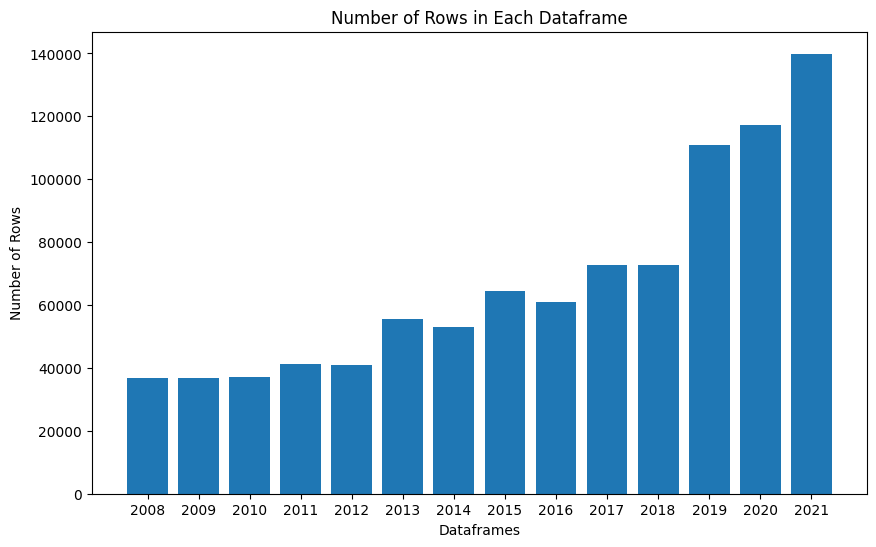

In [ ]:

dataframes = [df_08, df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21]

row_counts = [len(df) for df in dataframes]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 15), row_counts, tick_label=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.xlabel('Dataframes')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each Dataframe')
plt.show()


**Step 6:** We have more datapoints in the more recent datasets. Were more hospitals added or more indicators or what else could explain the difference?

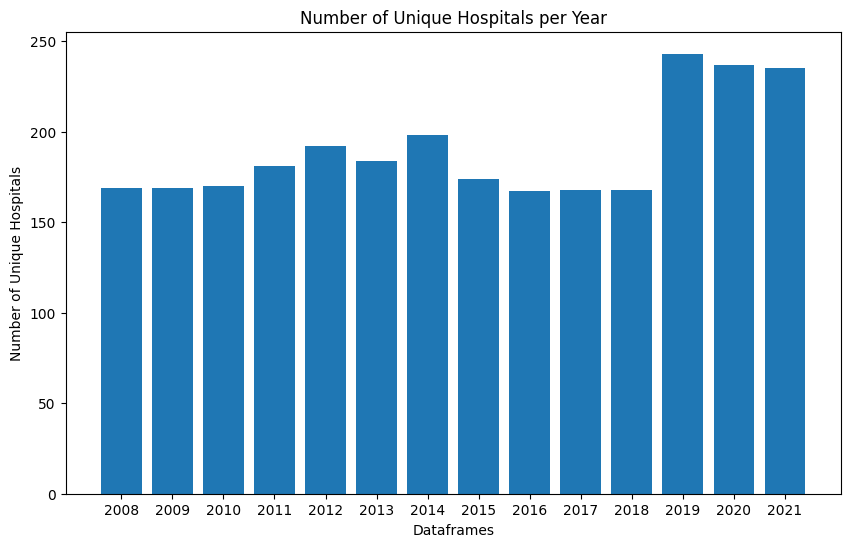

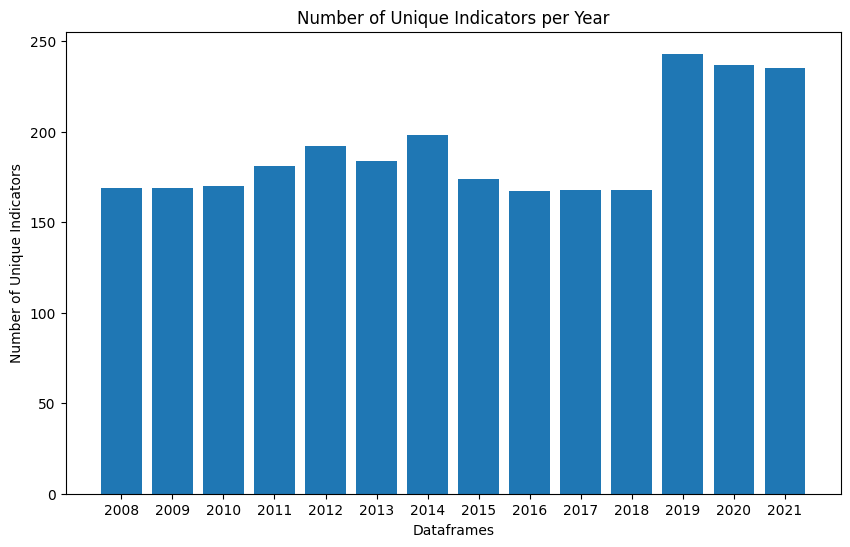

In [ ]:
nunique_hospitals = [df['hospital_name'].nunique() for df in dataframes]

plt.figure(figsize=(10, 6))
plt.bar(range(1, 15), nunique_hospitals, tick_label=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.xlabel('Dataframes')
plt.ylabel('Number of Unique Hospitals')
plt.title('Number of Unique Hospitals per Year')
plt.show()

nunique_indicators = [df['hospital_name'].nunique() for df in dataframes]

plt.figure(figsize=(10, 6))
plt.bar(range(1, 15), nunique_indicators, tick_label=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.xlabel('Dataframes')
plt.ylabel('Number of Unique Indicators')
plt.title('Number of Unique Indicators per Year')
plt.show()

**Step 7:** Let's find the Hospitals and Indicators that occur in all the sets and the ones that only occur in some

In [ ]:
hospital_names_08 = df_08['hospital_name'].unique()
hospital_names_09 = df_09['hospital_name'].unique()
hospital_names_10 = df_10['hospital_name'].unique()
hospital_names_11 = df_11['hospital_name'].unique()
hospital_names_12 = df_12['hospital_name'].unique()
hospital_names_13 = df_13['hospital_name'].unique()
hospital_names_14 = df_14['hospital_name'].unique()
hospital_names_15 = df_15['hospital_name'].unique()
hospital_names_16 = df_16['hospital_name'].unique()
hospital_names_17 = df_17['hospital_name'].unique()
hospital_names_18 = df_18['hospital_name'].unique()
hospital_names_19 = df_19['hospital_name'].unique()
hospital_names_20 = df_20['hospital_name'].unique()
hospital_names_21 = df_21['hospital_name'].unique()

#create an array that contains all the ndarrays with unique hospital names per year
hospital_names_08_21 = [hospital_names_08, hospital_names_09, hospital_names_10, hospital_names_11, hospital_names_12, hospital_names_13, hospital_names_14, hospital_names_15, hospital_names_16, hospital_names_17, hospital_names_18, hospital_names_19, hospital_names_20, hospital_names_21]

#flatten the array with all values
flattened_hospital_names_08_21 = np.concatenate(hospital_names_08_21)

#convert flattened array to a set to be able to perform set operations
unique_values = set(flattened_hospital_names_08_21)

# Initialize a set with all unique values from the first array
common_values = set(hospital_names_08)

# Find values that occur in all 14 arrays
for arr in hospital_names_08_21:
    common_values = common_values.intersection(set(arr))

# Find values that do not occur in all arrays
unique_to_some = unique_values.difference(common_values)

# Convert the result back to a list
unique_hospital_names_list = list(unique_to_some)

# Print the unique values
print("Unique values:", unique_hospital_names_list, 'Number of unique values: ', len(unique_hospital_names_list))



Unique values: ['Center da Sanda Val M¸stair Akutabteilung', 'Universit‰tsspital Z¸rich', 'Kantonsspital Baselland - Bruderholz, , 4101 Bruderholz', 'Universit‰ts≠Kinderspital beider Basel (UKBB) - UKBB, Spitalstrasse 33, 4056 Basel', 'Universitäts-Kinderspital Zürich das Spital der Eleonorenstiftung - Rehabilitationszentrum Affoltern, Mühlebergstrasse 104, 8910 Affoltern am Albis', 'Klinik Hohmad AG', 'LUKS Spitalbetriebe AG - LUKS Wolhusen, Spitalstrasse, 6110 Wolhusen', 'Insel Gruppe AG (nicht-universit‰r) - Spital Aarberg, Lyssstrasse 31, 3270 Aarberg', 'Maison de Naissance Tilia S‡rl', 'Limmatklinik AG - Limmatklinik AG, Hardturmstrasse 133, 8005 Zürich', 'Spitäler Frutigen Meiringen Interlaken AG - Spital Interlaken, Weissenaustrasse 27, 3800 Unterseen', 'HÙpital du Jura soins aigus', '80j weibl. Patientin, Cystektomie und Ileumconduit bei an‰misierender Makroh‰maturie bei kleinkapazit‰rer DK-versorgter Harnblase. OAK bei rez. LE, ASA III, Exitus letalis bei Nachblutung am 1. pos

**Step 8:** Let's merge the dataframe on hospital_name and indicator and then see where we have missing values, and how many rows we want to exclude

In [ ]:
merged_df_08_09 = pd.merge(df_08, df_09, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_10 = pd.merge(merged_df_08_09, df_10, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_10.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_10.csv', index=False)



In [ ]:
imported_08_10 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_10.csv')
merged_df_08_11= pd.merge(imported_08_10, df_11, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_11.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_11.csv', index=False)




In [ ]:
imported_08_11 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_11.csv')
merged_df_08_12= pd.merge(imported_08_11, df_12, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_11.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_12.csv', index=False)


NameError: ignored

In [ ]:
imported_08_12 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_12.csv')
merged_df_08_13= pd.merge(imported_08_12, df_13, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_13.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_13.csv', index=False)

NameError: ignored

In [ ]:
imported_08_13 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_13.csv')
merged_df_08_14= pd.merge(imported_08_13, df_14, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_14.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_14.csv', index=False)

In [ ]:
imported_08_14 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_14.csv')
merged_df_08_15= pd.merge(imported_08_14, df_15, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_15.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_15.csv', index=False)

In [ ]:
imported_08_15 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_15.csv')
merged_df_08_16= pd.merge(imported_08_15, df_16, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_16.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_16.csv', index=False)

In [ ]:
imported_08_16 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_16.csv')
merged_df_08_17= pd.merge(imported_08_16, df_17, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_17.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_17.csv', index=False)

NameError: ignored

In [ ]:
imported_08_17 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_17.csv')
merged_df_08_18= pd.merge(imported_08_17, df_18, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_18.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_18.csv', index=False)

In [ ]:
imported_08_18 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_18.csv')
merged_df_08_19= pd.merge(imported_08_18, df_19, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_19.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_19.csv', index=False)

NameError: ignored

In [ ]:
imported_08_19 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_19.csv')
merged_df_08_20= pd.merge(imported_08_19, df_20, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_20.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_20.csv', index=False)

NameError: ignored

In [ ]:
imported_08_20 = pd.read_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_20.csv')
merged_df_08_21= pd.merge(imported_08_20, df_21, on=['hospital_name', 'indicator'], how='inner')
merged_df_08_21.to_csv('/content/drive/MyDrive/Module1_CDR/DF Merging/df_08_21.csv', index=False)

NameError: ignored

In [ ]:
url = "https://spitalstatistik.bagapps.ch/data/download/kzp21_KZ_TimeSerie.xlsx?v=1678279041"
sheet = 'KZ2008-KZ2021'
hospital_data = pd.read_excel(url, sheet_name=sheet)


NameError: ignored

In [ ]:
print(hospital_data.columns)

Index(['JAHR', 'KT', 'Status', 'Inst', 'Adr', 'Ort', 'Typ', 'Notfalldienst',
       'Infrastruktur1', 'Infrastruktur2',
       ...
       'ErlOKPAmbB', 'ErlStatB', 'ErlKVGStatB', 'ErlKVGStatVB',
       'ErlZvOKPStatB', 'ErlZvOKPStatVB', 'ErlLangB', 'PTageLang', 'AustLang',
       'KostLangT'],
      dtype='object', length=216)
